#### Подключение библиотек

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

#### Пути к директориям и файлам

In [62]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'
SAMPLE_DATASET_PATH = './sample_submission.csv'

### 1. Загрузка данных

In [63]:
df_train = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [64]:
df_train.shape

(10000, 20)

In [65]:
df_train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [66]:
df_test = pd.read_csv(TEST_DATASET_PATH, sep=',')
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [67]:
df_test.shape

(5000, 19)

In [68]:
df_test.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2'],
      dtype='object')

In [69]:
df_sample = pd.read_csv(SAMPLE_DATASET_PATH, sep=',')

In [70]:
df_sample.shape

(5000, 2)

In [71]:
df_sample.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


### 2. Приведение типов данных

In [72]:
df_train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [73]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [74]:
df_train['HouseFloor'] = df_train['HouseFloor'].astype(np.int64)
df_test['HouseFloor'] = df_test['HouseFloor'].astype(np.int64)

In [75]:
df_train['Id'] = df_train['Id'].astype(str)
df_train['DistrictId'] = df_train['DistrictId'].astype(str)

### 3. Обработка пропусков

In [76]:
df_train.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [77]:
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


#### Пропуски в LifeSquare - жилой площади

Вычислим долю, которую в среднем составляет жилая площадь от полной площади квартиры, и для пропущенных значений LifeSquare посчитаем соответствующую долю от полной площади квартиры.

In [78]:
condition = ~df_train['LifeSquare'].isna()
part = np.mean(df_train[condition]['LifeSquare'] / df_train[condition]['Square'])

Заполняем пропуски в LifeSquare исходя из средней доли от общей площади квартиры:

In [79]:
df_train.loc[condition, 'LifeSquare'] = df_train.loc[condition, 'Square'] * part

In [80]:
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,26.523871,8.0,7,8,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,52.166889,10.0,2,17,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,42.806448,9.0,16,16,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


Заполняем пропуски в тестовых данных:

In [81]:
df_test.loc[condition, 'LifeSquare'] = df_test.loc[condition, 'Square'] * part

#### Пропуски в Healthcare_1 - показателе охраны здоровья

In [82]:
df_train['Healthcare_1'].isna().sum()

4798

Почти в половине записей значение Healthcare_1 отсутствует. Поэтому не будем использовать данный признак и удалим его.

In [83]:
df_train.drop('Healthcare_1', axis=1, inplace=True)

In [84]:
df_test.drop('Healthcare_1', axis=1, inplace=True)

### 4. Обработка выбросов

Сначала посмотрим на гистограммах на распределение количественных признаков.

In [85]:
df_num_features = df_train.select_dtypes(include=['float64', 'int64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001A5E1C99D0>,
      dtype=object)

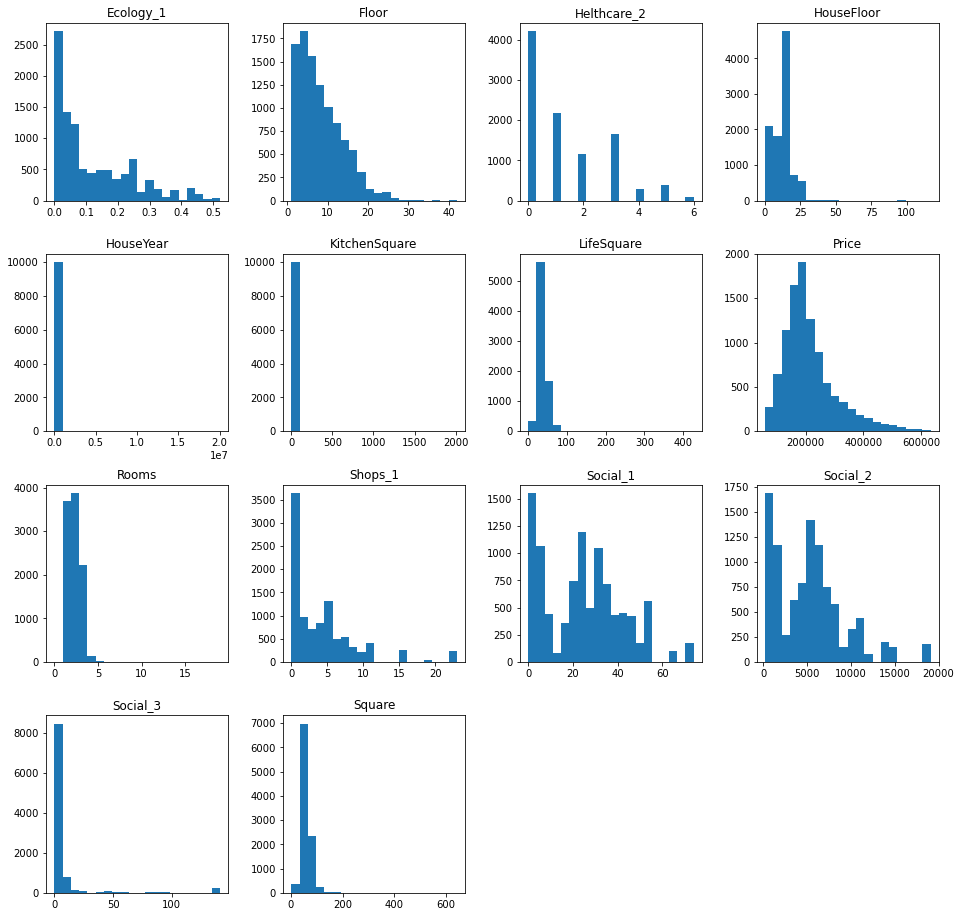

In [86]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False)

Глядя на гистограммы, можно предположить, что выбросы имеются в признаках HouseFloor, HouseYear, KitchenSquare, LifeSquare, Rooms, Square.

#### Соотношение между HouseFloor и Floor

Значение Floor (этаж квартиры) не должно превышать значения HouseFloor (общее количество этажей в доме). Если это условие нарушено,то будем предполагать, что при вводе данных оператор перепутал эти два поля. То есть нам надо поменять значения FLoor и HouseFloor.

In [87]:
condition = df_train['HouseFloor'] < df_train['Floor']

In [88]:
df_train[condition]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
17,1190,8,2.0,49.396000,32.892044,5.0,6,5,1962,0.458174,B,A,26,4439,1,1,5,B,186971.926566
19,367,45,1.0,42.367289,28.211733,1.0,16,14,2015,0.195781,B,B,23,5212,6,3,2,B,250466.980777
21,8471,20,3.0,75.611065,50.348257,8.0,11,9,1976,0.019509,B,B,37,7687,11,5,5,B,366916.246494
24,4717,27,1.0,44.203947,NaN,0.0,2,0,1977,0.072158,B,B,2,629,1,0,0,A,135466.559958
25,4521,6,2.0,65.409965,NaN,1.0,18,1,1977,0.243205,B,B,5,1564,0,0,0,B,191205.272608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,16258,48,3.0,96.056784,63.962750,1.0,15,1,2017,0.041125,B,B,46,9515,5,1,10,B,524365.550705
9968,9920,1,3.0,86.487550,NaN,1.0,18,17,1977,0.007122,B,B,1,264,0,0,1,B,248248.935528
9970,13501,6,1.0,41.310416,27.507977,9.0,18,17,1977,0.243205,B,B,5,1564,0,0,0,B,114878.830713
9975,4944,6,2.0,52.573133,NaN,1.0,18,17,1977,0.243205,B,B,5,1564,0,0,0,B,154366.031184


In [89]:
df_train['FloorTemp'] = df_train['Floor']
df_train.loc[condition, 'Floor'] = df_train.loc[condition, 'HouseFloor']
df_train.loc[condition, 'HouseFloor'] = df_train.loc[condition, 'FloorTemp']
df_train.drop('FloorTemp', axis=1, inplace=True)

In [90]:
df_train[df_train['HouseFloor'] < df_train['Floor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [91]:
condition = df_test['HouseFloor'] < df_test['Floor']

In [92]:
df_test['FloorTemp'] = df_test['Floor']
df_test.loc[condition, 'Floor'] = df_test.loc[condition, 'HouseFloor']
df_test.loc[condition, 'HouseFloor'] = df_test.loc[condition, 'FloorTemp']
df_test.drop('FloorTemp', axis=1, inplace=True)

In [93]:
df_test[df_test['HouseFloor'] < df_test['Floor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2


#### HouseYear

Найдем строки с некорректно указанным годом (слишком маленький или слишком большой). Таких строк всего две, поэтому можем их просто удалить.

In [94]:
condition = (df_train['HouseYear'] > 2020)
df_train[condition]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
8828,11607,147,2.0,44.791836,29.826202,5.0,4,9,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096
9163,10814,109,1.0,37.265070,24.814243,9.0,9,12,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396


In [95]:
df_train.loc[condition, 'HouseYear'].value_counts()

20052011    1
4968        1
Name: HouseYear, dtype: int64

In [96]:
df_train.loc[condition, 'HouseYear'] = 2020
df_train[df_train['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


#### KitchenSquare

In [97]:
df_train['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
43.0         2
112.0        2
41.0         2
32.0         2
58.0         2
25.0         2
37.0         2
30.0         2
51.0         2
40.0         1
96.0         1
48.0         1
72.0         1
73.0         1
2014.0       1
66.0         1
36.0         1
78.0         1
54.0         1
29.0         1
31.0         1
35.0         1
62.0         1
39.0         1
1970.0       1
60.0         1
75.0         1
26.0         1
21.0         1
84.0         1
63.0         1
123.0        1
53.0         1
42.0         1
23.0         1
27.0         1
Name: KitchenSquare, dtype: int64

In [98]:
df_train['KitchenSquare'].quantile(.975)

13.0

Будем считать выбросами значения площади, больше чем квантиль 97,5%, а также площади в 0, 1 и 2 квадратных метра. Для выбросов поступим аналогично пропускам в LifeSquare: вычислим долю, которую в среднем составляет площадь кухни от полной площади квартиры, и для выбросов заменим значение KitchenSquare на соответствующую долю от полной площади квартиры.

In [99]:
condition = (df_train['KitchenSquare'] > df_train['KitchenSquare'].quantile(.975)) | df_train['KitchenSquare'].isna() | (df_train['KitchenSquare'] < 3)
part = np.mean(df_train[condition]['KitchenSquare'] / df_train[condition]['Square'])
part

0.0640367218271248

In [100]:
df_test.loc[condition, 'KitchenSquare'] = df_test.loc[condition, 'Square'] * part

#### Rooms

In [101]:
df_train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Выбросами выглядят квартиры с количеством комнат не меньше 6 либо 0. Заменим 0 на 1, а остальные выбросы - на медиану.

In [102]:
df_train['Rooms_outlier'] = 0
df_train.loc[(df_train['Rooms'] == 0) | (df_train['Rooms'] >= 6), 'Rooms_outlier'] = 1
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
0,11809,27,3.0,115.027311,NaN,10.0,4,10,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089,0
1,3013,22,1.0,39.832524,26.523871,8.0,7,8,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407,0
2,8215,1,3.0,78.342215,52.166889,10.0,2,17,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850,0
3,2352,1,1.0,40.409907,NaN,1.0,10,22,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630,0
4,13866,94,2.0,64.285067,42.806448,9.0,16,16,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962,0


In [103]:
df_train.loc[df_train['Rooms'] == 0, 'Rooms'] = 1
df_train.loc[df_train['Rooms'] >= 6, 'Rooms'] = df_train['Rooms'].median()

#### Square

In [104]:
df_train['Square'].value_counts()

26.553188     1
46.363496     1
100.751999    1
70.726600     1
40.523022     1
             ..
76.481158     1
86.915187     1
82.482521     1
43.112986     1
97.664912     1
Name: Square, Length: 10000, dtype: int64

In [105]:
df_train.loc[df_train['Square'] > 200, 'Square'].value_counts()

641.065193    1
275.645284    1
212.932361    1
200.334539    1
604.705972    1
409.425181    1
Name: Square, dtype: int64

Будем считать выбросами квартиры с площадью > 200 кв. м и заменим их площадь на медиану.

In [106]:
df_train['Square_outlier'] = 0
df_train.loc[df_train['Square'] >= 200, 'Rooms_outlier'] = 1
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,Square_outlier
0,11809,27,3.0,115.027311,NaN,10.0,4,10,2014,0.075424,...,B,11,3097,0,0,0,B,305018.871089,0,0
1,3013,22,1.0,39.832524,26.523871,8.0,7,8,1966,0.118537,...,B,30,6207,1,1,0,B,177734.553407,0,0
2,8215,1,3.0,78.342215,52.166889,10.0,2,17,1988,0.025609,...,B,33,5261,0,3,1,B,282078.720850,0,0
3,2352,1,1.0,40.409907,NaN,1.0,10,22,1977,0.007122,...,B,1,264,0,0,1,B,168106.007630,0,0
4,13866,94,2.0,64.285067,42.806448,9.0,16,16,1972,0.282798,...,B,33,8667,2,0,6,B,343995.102962,0,0


In [107]:
df_train.loc[df_train['Square'] >= 200, 'Square'] = df_train['Square'].median()

### 5. Построение новых признаков

#### Dummies

In [108]:
binary_to_numbers = {'A': 0, 'B': 1}

df_train['Ecology_2'] = df_train['Ecology_2'].replace(binary_to_numbers)
df_train['Ecology_3'] = df_train['Ecology_3'].replace(binary_to_numbers)
df_train['Shops_2'] = df_train['Shops_2'].replace(binary_to_numbers)

In [109]:
df_train.median()

Id                  8394.500000
DistrictId            36.000000
Rooms                  2.000000
Square                52.513040
LifeSquare            33.875321
KitchenSquare          6.000000
Floor                  7.000000
HouseFloor            14.000000
HouseYear           1977.000000
Ecology_1              0.075424
Ecology_2              1.000000
Ecology_3              1.000000
Social_1              25.000000
Social_2            5285.000000
Social_3               2.000000
Helthcare_2            1.000000
Shops_1                3.000000
Shops_2                1.000000
Price             192269.644879
Rooms_outlier          0.000000
Square_outlier         0.000000
dtype: float64

### 6. Сбор функций в один класс

In [110]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        self.life_square_part = None
        self.kitchen_square_part = None
        self.binary_to_numbers = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
        self.life_square_part = np.mean(X[~X['LifeSquare'].isna()]['LifeSquare'] / X[~X['LifeSquare'].isna()]['Square'])
        self.kitchen_square_part = np.mean(X[~X['KitchenSquare'].isna()]['KitchenSquare'] / X[~X['KitchenSquare'].isna()]['Square'])
        self.binary_to_numbers = {'A': 0, 'B': 1}
    
    def transform(self, X):
        """Трансформация данных"""

        # Data type
        X['HouseFloor'] = X['HouseFloor'].astype(np.int64)
        X['Id'] = X['Id'].astype(str)
        X['DistrictId'] = X['DistrictId'].astype(str)
        
        # LifeSquare
        condition = ~X['LifeSquare'].isna()
        X.loc[condition, 'LifeSquare'] = X.loc[condition.isna(), 'Square'] * self.life_square_part
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
        
        # HouseFloor и Floor
        X['FloorTemp'] = X['Floor']
        X.loc[X['HouseFloor'] < X['Floor'], 'Floor'] = X.loc[X['HouseFloor'] < X['Floor'], 'HouseFloor']
        X.loc[X['HouseFloor'] < X['Floor'], 'HouseFloor'] = X.loc[X['HouseFloor'] < X['Floor'], 'FloorTemp']
        X.drop('FloorTemp', axis=1, inplace=True)
        
        # HouseYear
        X.loc[X['HouseYear'] > 2020, 'HouseYear'] = 2020
        
        # KitchenSquare
        condition = (X['KitchenSquare'] > X['KitchenSquare'].quantile(.975)) | X['KitchenSquare'].isna() | (X['KitchenSquare'] < 3)
        X.loc[condition, 'KitchenSquare'] = X.loc[condition.isna(), 'Square'] * self.kitchen_square_part
        
        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        # Square
        X['Square_outlier'] = 0
        X.loc[X['Square'] >= 200, 'Rooms_outlier'] = 1
        X.loc[X['Square'] >= 200, 'Square'] = self.medians['Square']
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers) 
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        X.fillna(self.medians, inplace=True)
        
        return X

### 7. Предобработка данных

In [111]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)


preprocessor = DataPreprocessing()
preprocessor.fit(df_train)

df_train = preprocessor.transform(df_train)
df_test = preprocessor.transform(df_test)
df_train.shape, df_test.shape

((10000, 21), (5000, 20))

### 8. Отбор признаков

In [112]:
df_train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Rooms_outlier',
 'Square_outlier']

In [113]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['Rooms_outlier', 'Square_outlier']

target_name = 'Price'

### 9. Разбиение данных на train и test

In [114]:
X = df_train[feature_names + new_feature_names]
y = df_train[target_name]

df_test = df_test[feature_names + new_feature_names]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=21)

### 10. Построение модели

#### Обучение

In [116]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42, min_samples_leaf=2)

In [117]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=2, random_state=42)

#### Функция оценки модели

In [118]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

#### Оценка модели

Train R2:	0.872
Test R2:	0.742


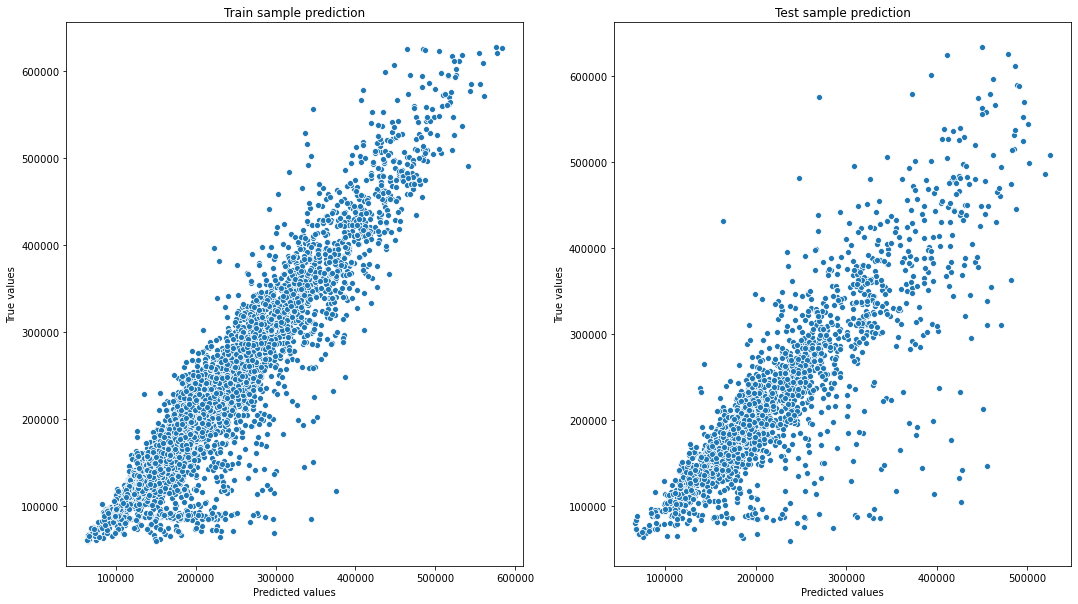

In [119]:
y_train_preds = rfr.predict(X_train)
y_test_preds = rfr.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

### 11. Прогнозирование на тестовом датасете

Предобработка тестового датасета уже была выполнена ранее.

In [120]:
predictions = rfr.predict(df_test)
predictions

array([156653.89638905, 124237.74580933, 144008.83083076, ...,
       149943.53518488, 187888.1748969 , 263899.05271673])

In [121]:
df_sample['Price'] = predictions
df_sample.head()

,Id,Price
0,4567,156653.896389
1,5925,124237.745809
2,960,144008.830831
3,3848,138914.947444
4,746,205070.711072


In [122]:
df_sample.to_csv('rfr_submit.csv', index=False)